# Titanic: Machine Learning from Disaster

Опис датафрейму:

+ PassengerId - id пасажира
+ Survived - вижив пасажир чи ні
+ Pclass – клас квитка, який він придбав
+ Name - ім'я
+ Sex - стать
+ Age - вік
+ SibSp - кількість супутніх пасажирів
+ Parch - кількість батьків/дітей на борту Титаніка
+ Ticket - номер квитка
+ Fare - вартість квитка
+ Cabin - каюта, в якій він їхав
+ Embarked - де саме пасажир сідав на корабель (C = Шербур, Q = Куїнстаун, S = Саутгемптон)

**Завдання: навчити дерево рішень, яке передбачатиме вижив пасажир або загину, ґрунтуючись на даних пасажирів з датасету titanic.csv.**

In [57]:
#!pip install graphviz
#!pip install missingno


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
import missingno as msno

%matplotlib inline

from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Load data from csv file titanic.csv

In [59]:
dataset = pd.read_csv('titanic.csv')

In [60]:
dataset.head()


,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
dataset.tail()

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Statistics characteristics

In [62]:
dataset.shape

(891, 12)

In [63]:
dataset.describe()

,PassengerID,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check NaN

In [65]:
dataset.isnull().sum()

PassengerID      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
687/891

0.7710437710437711

77% пропущених даних в колонці Cabin. Немає сенсу використовувати цю колонку, чи тим більше заповнювати 687 прикладів найчастіше згаданим класом, адже тоді отримаємо великий "перекос" на користь одного класу, до того ж створений штучно.

<Axes: >

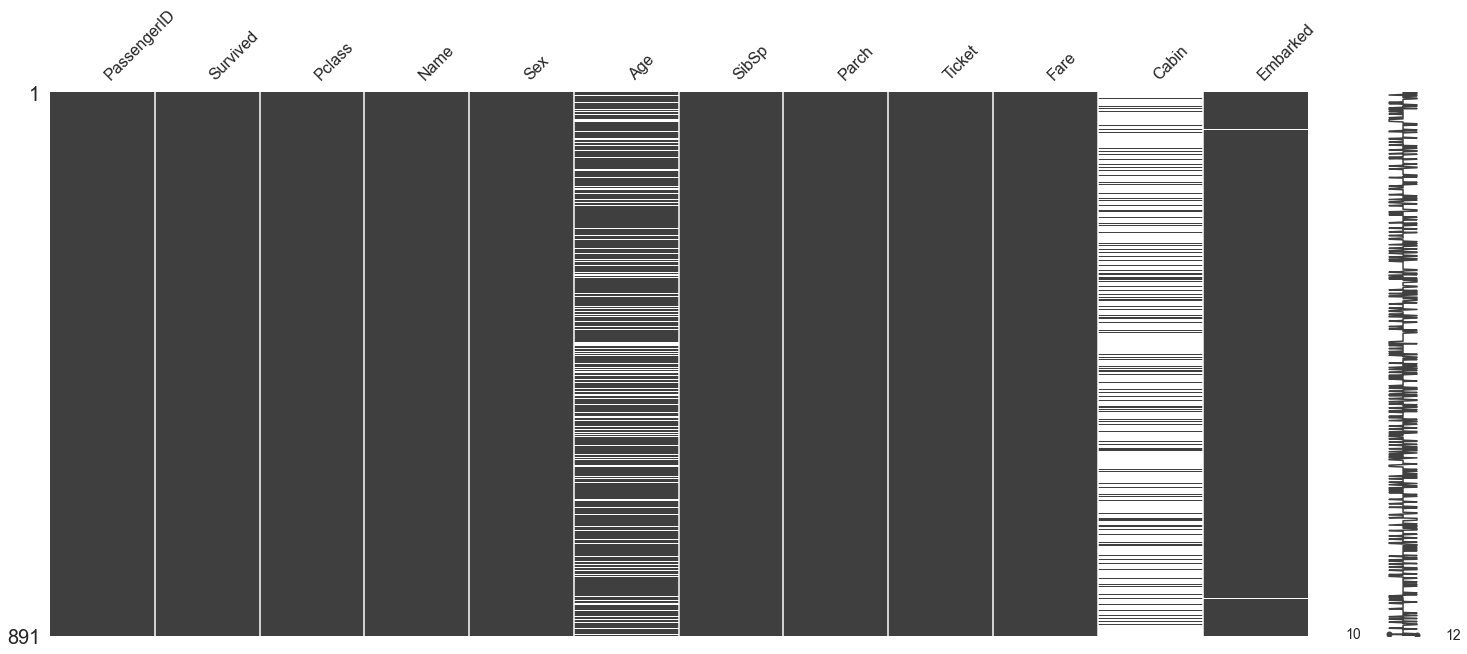

In [67]:
msno.matrix(dataset)

In [68]:
# unique()
for column in dataset[['Pclass', 'Sex', 'Age', 'Cabin', 'Embarked', 'Ticket']]:
    unique_values = dataset[column].unique()
    print(f'{len(unique_values)} unique values in {column}: {unique_values}')

3 unique values in Pclass: [3 1 2]
2 unique values in Sex: ['male' 'female']
89 unique values in Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
148 unique values in Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D'

## Drop attributes

In [69]:
dataset = dataset.drop(['PassengerID', 'Cabin'], axis=1)
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Filling the gaps

<Axes: xlabel='Age', ylabel='Density'>

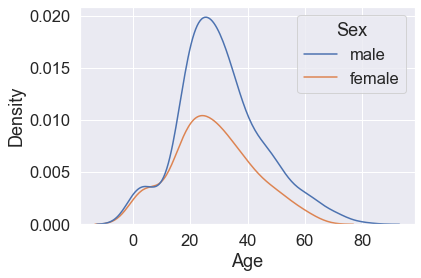

In [70]:
sns.kdeplot(data=dataset, x="Age", hue="Sex")

In [71]:
dataset.Age.median()

28.0

In [72]:
dataset = dataset.fillna({'Age': dataset.Age.median()})
dataset.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

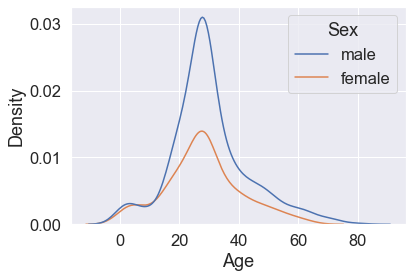

In [73]:
sns.kdeplot(data=dataset, x="Age", hue="Sex")

## Filling with most common class (categorical data)

In [74]:
# apply()
def fill_most_common_class(column):
    most_common_class = column.mode().iloc[0]
    return column.fillna(most_common_class)

# Apply the function to the specified column
dataset[['Embarked']] = dataset[['Embarked']].apply(fill_most_common_class)
dataset['Embarked']
#sns.kdeplot(data=dataset, x="Cabin")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

### Categorical data check

In [75]:
len(dataset['Embarked'].unique())

3

<Axes: xlabel='Embarked', ylabel='count'>

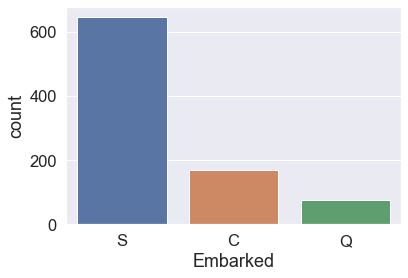

In [76]:
sns.countplot(x=dataset["Embarked"])

## Data Normalization

In [77]:
df_encoded = pd.get_dummies(data=dataset, columns=['Sex', 'Pclass', 'Embarked'])
df_encoded

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True,False,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False,True,False,False
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True,False,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,True,False,False,False,False,True
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,False,True,False,False,False,True
887,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,True,False,False,False,False,True
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,True,False,False,False,True,False,False,True
889,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,True,False,False,True,False,False


## Check Target attribute

In [78]:
y = df_encoded['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Feature engineering

Колонку з іменем пасажира буде видалено, адже вона не несе ніякої інформації стосовно виживання. Також ми не братимемо до уваги колонку Ticket, адже це стрічкова змінна, що містить більше 600 унікальних значень, тому нема сенсу перетворювати її в категоріальну.

In [79]:
df_encoded = df_encoded.drop(['Name', 'Ticket'], axis=1)
df_encoded

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,True,False,False,False,False,True
4,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,False,True,False,True,False,False,False,True
887,1,19.0,0,0,30.0000,True,False,True,False,False,False,False,True
888,0,28.0,1,2,23.4500,True,False,False,False,True,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False,True,False,False


In [80]:
X = df_encoded.drop('Survived', axis = 1)
X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,35.0,1,0,53.1000,True,False,True,False,False,False,False,True
4,35.0,0,0,8.0500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,False,True,False,True,False,False,False,True
887,19.0,0,0,30.0000,True,False,True,False,False,False,False,True
888,28.0,1,2,23.4500,True,False,False,False,True,False,False,True
889,26.0,0,0,30.0000,False,True,True,False,False,True,False,False


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision Tree Classifier

In [82]:
my_tree =  tree.DecisionTreeClassifier()

In [83]:
my_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred = my_tree.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print(f'Train accuracy: {accuracy}')

y_pred = my_tree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')


Train accuracy: 0.9789325842696629
Test accuracy: 0.7821229050279329


## Fine tuning

In [85]:
my_tree = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': [7, 6, 5],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=my_tree, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 6, 5], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 4, 5]},
             scoring='accuracy')

In [86]:
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_clf = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3}


## Metrics

In [87]:
y_pred = best_clf.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print(f'Train accuracy: {accuracy}')

y_pred = best_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')


Train accuracy: 0.8469101123595506
Test accuracy: 0.8044692737430168


Завдяки пошуку по сітці оптимальних параметрів нам вдалося знизити перенавчання та навіть покращити точність на тестувальному наборі на 2.2% порівняно з деревом без цих налаштувань

## Random Forest

In [94]:
classifier = RandomForestClassifier()

In [95]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
y_pred = classifier.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print(f'Train accuracy: {accuracy}')

y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')


Train accuracy: 0.9789325842696629
Test accuracy: 0.8156424581005587


## Fine tuning

In [101]:
classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [60, 70, 80],
    'max_depth': [7, 6, 5],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 3, 4]
}

''' 
'max_depth': [5, 4, 3],
    'min_samples_split': [2, 3, 7],
    'min_samples_leaf': [1, 4, 6]
'''

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 6, 5], 'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [60, 70, 80]},
             scoring='accuracy')

In [102]:
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
#Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 80}


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 70}


In [103]:
y_pred = best_clf.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print(f'Train accuracy: {accuracy}')

y_pred = best_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')


Train accuracy: 0.8497191011235955
Test accuracy: 0.8212290502793296


Вдалось значно зменшити перенавчання і водночас трохи збільшити точність на тестувальному датасеті, порівняно з випадком без додаткових налаштувань. Максимальна тестувальна точність, яку було досягнуто - 0.821229